### Summary
In this notebook we will query Air Quality data from the Labservice Stations in Ferrara.

In this notebook we will:
* Request data from the API
* Put them into a Pandas DataFrame
* Transform it into a GeoDataFrame
* Plot the data with a background map and color the point according to the value of a pollutant

In [162]:
import requests
import pandas as pd
import json
import geopandas as gpd
import contextily as cx

In [143]:
#Install libraries if necessary with 
#pip install 
#or !pip install

In [144]:
#INPUT PARAMETERS
org = "'aq_labservice'"
dt = "2023-06-26T16:00:00.000Z" #starting date of the data

```python
https://iot.comune.fe.it/FROST-Server/v1.1/
    Locations?
        $expand=
            Things($select=name)/
            Datastreams($select=name,phenomenonTime)/
            Observations(
                $select=phenomenonTime,result;
                $filter=phenomenonTime ge " + dt +"
            )
        $filter=properties/organization eq " + org
```

In [146]:
#REQUESTS
response = requests.get(
        f"https://iot.comune.fe.it/FROST-Server/v1.1/Locations?$expand=Things($select=name)/Datastreams($select=name,phenomenonTime)/Observations($select=phenomenonTime,result;$filter=phenomenonTime ge {dt})&$filter=properties/organization eq {org}"
)

In [147]:
data_json = response.json()
data_json

{'value': [{'description': 'Via Rino Maragno 46, Ferrara',
   'encodingType': 'application/vnd.geo+json',
   '@iot.id': 'aq_labservice_LS0621020065',
   'location': {'type': 'Point', 'coordinates': [11.607838, 44.860988]},
   'name': 'Barco',
   'properties': {'organization': 'aq_labservice'},
   '@iot.selfLink': "https://iot.comune.fe.it/FROST-Server/v1.1/Locations('aq_labservice_LS0621020065')",
   'Things': [{'name': 'Stazione LS0621020065',
     'Datastreams': [{'name': 'VOC',
       'phenomenonTime': '2021-09-10T14:00:00.000Z/2023-06-28T09:00:00.000Z',
       'Observations': [{'phenomenonTime': '2023-06-26T16:00:00.000Z',
         'result': '225.0231'},
        {'phenomenonTime': '2023-06-26T17:00:00.000Z', 'result': '228.8984'},
        {'phenomenonTime': '2023-06-26T18:00:00.000Z', 'result': '231.0523'},
        {'phenomenonTime': '2023-06-26T19:00:00.000Z', 'result': '234.0843'},
        {'phenomenonTime': '2023-06-26T20:00:00.000Z', 'result': '235.4683'},
        {'phenomenonT

In [148]:
list_tmp = []

for location in data_json['value']:
    for thing in location['Things']:
        for datastream in thing['Datastreams']:
            for observation in datastream['Observations']:

                list_tmp.append([
                    location['name'],
                    location['location']['coordinates'][0],  # x
                    location['location']['coordinates'][1],  # y
                    datastream['name'],
                    observation['phenomenonTime'],
                    observation['result']
                ])

In [149]:
df = pd.DataFrame(list_tmp, columns=['location', 'lon', 'lat','pollutant', 'timestamp', 'result'])
# The next line is used to download the data as CSV. If you run it, you will find the file in the same folder as the notebook.
#df.to_csv('datiFerrara.csv', index=False)
df

,location,lon,lat,pollutant,timestamp,result
0,Barco,11.607838,44.860988,VOC,2023-06-26T16:00:00.000Z,225.0231
1,Barco,11.607838,44.860988,VOC,2023-06-26T17:00:00.000Z,228.8984
2,Barco,11.607838,44.860988,VOC,2023-06-26T18:00:00.000Z,231.0523
3,Barco,11.607838,44.860988,VOC,2023-06-26T19:00:00.000Z,234.0843
4,Barco,11.607838,44.860988,VOC,2023-06-26T20:00:00.000Z,235.4683
...,...,...,...,...,...,...
4135,CUS Ferrara,11.633109,44.850239,O3,2023-06-28T05:00:00.000Z,33
4136,CUS Ferrara,11.633109,44.850239,O3,2023-06-28T06:00:00.000Z,48.1
4137,CUS Ferrara,11.633109,44.850239,O3,2023-06-28T07:00:00.000Z,65.1
4138,CUS Ferrara,11.633109,44.850239,O3,2023-06-28T08:00:00.000Z,71.2


In [150]:
#Filtering the rows and keeping only the one about CO (You can change the pollutant and get data about VOC, O3, ...)
df_CO = df[(df.pollutant == "CO")]
df_CO

,location,lon,lat,pollutant,timestamp,result
84,Barco,11.607838,44.860988,CO,2023-06-26T16:00:00.000Z,0.1855
85,Barco,11.607838,44.860988,CO,2023-06-26T17:00:00.000Z,0.1462
86,Barco,11.607838,44.860988,CO,2023-06-26T18:00:00.000Z,0.1654
87,Barco,11.607838,44.860988,CO,2023-06-26T19:00:00.000Z,0.1525
88,Barco,11.607838,44.860988,CO,2023-06-26T20:00:00.000Z,0.1492
...,...,...,...,...,...,...
3883,CUS Ferrara,11.633109,44.850239,CO,2023-06-28T05:00:00.000Z,0.1631
3884,CUS Ferrara,11.633109,44.850239,CO,2023-06-28T06:00:00.000Z,0.1649
3885,CUS Ferrara,11.633109,44.850239,CO,2023-06-28T07:00:00.000Z,0.1756
3886,CUS Ferrara,11.633109,44.850239,CO,2023-06-28T08:00:00.000Z,0.1731


In [151]:
# Get the max value of CO for each location
# You can also perform other funciton, like mean, min, sum, ...
df_CO_max = df_CO.filter(items=['location', 'lon', 'lat', 'result'])
df_CO_max = df_CO_max.groupby(['location', 'lon', 'lat']).max()
df_CO_max.reset_index(inplace=True)
df_CO_max

,location,lon,lat,result
0,Arginone,11.583010,44.842270,0.2316
1,Barco,11.607838,44.860988,0.2354
2,Bologna,11.589487,44.808802,0.2193
3,CUS Ferrara,11.633109,44.850239,0.2137
4,Cocomaro di Cona,11.683750,44.812002,0.243
5,Corso Isonzo,11.612110,44.841510,0.2553
6,Modena,11.598717,44.846107,0.3401
7,Mosti,11.609195,44.826850,0.2893
8,Pontelagoscuro,11.601144,44.879184,0.3006
9,Porta Catena,11.612900,44.848840,0.3437


In [152]:
gdf_CO_max = gpd.GeoDataFrame(
    df_CO_max, geometry=gpd.points_from_xy(df_CO_max.lon, df_CO_max.lat), crs="EPSG:4326"
)

gdf_CO_max

,location,lon,lat,result,geometry
0,Arginone,11.583010,44.842270,0.2316,POINT (11.58301 44.84227)
1,Barco,11.607838,44.860988,0.2354,POINT (11.60784 44.86099)
2,Bologna,11.589487,44.808802,0.2193,POINT (11.58949 44.80880)
3,CUS Ferrara,11.633109,44.850239,0.2137,POINT (11.63311 44.85024)
4,Cocomaro di Cona,11.683750,44.812002,0.243,POINT (11.68375 44.81200)
5,Corso Isonzo,11.612110,44.841510,0.2553,POINT (11.61211 44.84151)
6,Modena,11.598717,44.846107,0.3401,POINT (11.59872 44.84611)
7,Mosti,11.609195,44.826850,0.2893,POINT (11.60919 44.82685)
8,Pontelagoscuro,11.601144,44.879184,0.3006,POINT (11.60114 44.87918)
9,Porta Catena,11.612900,44.848840,0.3437,POINT (11.61290 44.84884)


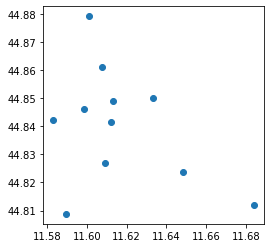

In [153]:
gdf_CO_max.plot();

In [154]:
gdf_CO_max = gdf_CO_max.to_crs(epsg=3857)
gdf_CO_max.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

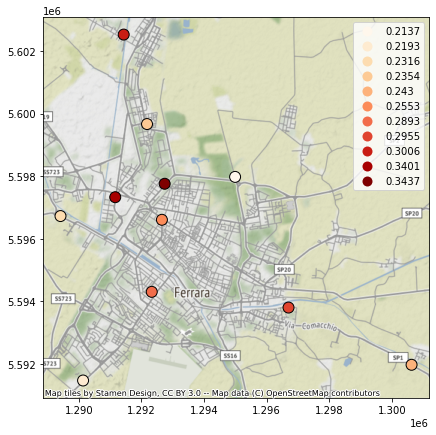

In [161]:
ax = gdf_CO_max.plot(figsize=(7, 7),
                     markersize=120,
                     edgecolor="k",
                     column="result", 
                     cmap='OrRd', 
                     legend = 'true'
                    )

cx.add_basemap(ax, zoom=13)